# Plot the H5 archive

Available rasters:
['bands/elevation', 'bands/i_VH', 'bands/i_VV', 'bands/latitude', 'bands/localIncidenceAngle', 'bands/longitude', 'bands/q_VH', 'bands/q_VV']

File attributes:
Root attributes: {}

Group/Dataset: bands
  Attributes: {}
  elevation attributes: {'CLASS': b'IMAGE', 'IMAGE_VERSION': 1.2, 'log10_scaled': b'false', 'raster_height': 1012, 'raster_width': 1190, 'scaling_factor': 1.0, 'scaling_offset': 0.0, 'unit': b'meters'}
  i_VH attributes: {'CLASS': b'IMAGE', 'IMAGE_VERSION': 1.2, 'log10_scaled': b'false', 'raster_height': 1012, 'raster_width': 1190, 'scaling_factor': 1.0, 'scaling_offset': 0.0, 'unit': b'real'}
  i_VV attributes: {'CLASS': b'IMAGE', 'IMAGE_VERSION': 1.2, 'log10_scaled': b'false', 'raster_height': 1012, 'raster_width': 1190, 'scaling_factor': 1.0, 'scaling_offset': 0.0, 'unit': b'real'}
  latitude attributes: {'CLASS': b'IMAGE', 'IMAGE_VERSION': 1.2, 'log10_scaled': b'false', 'raster_height': 1012, 'raster_width': 1190, 'scaling_factor': 1.0, 'scaling_of

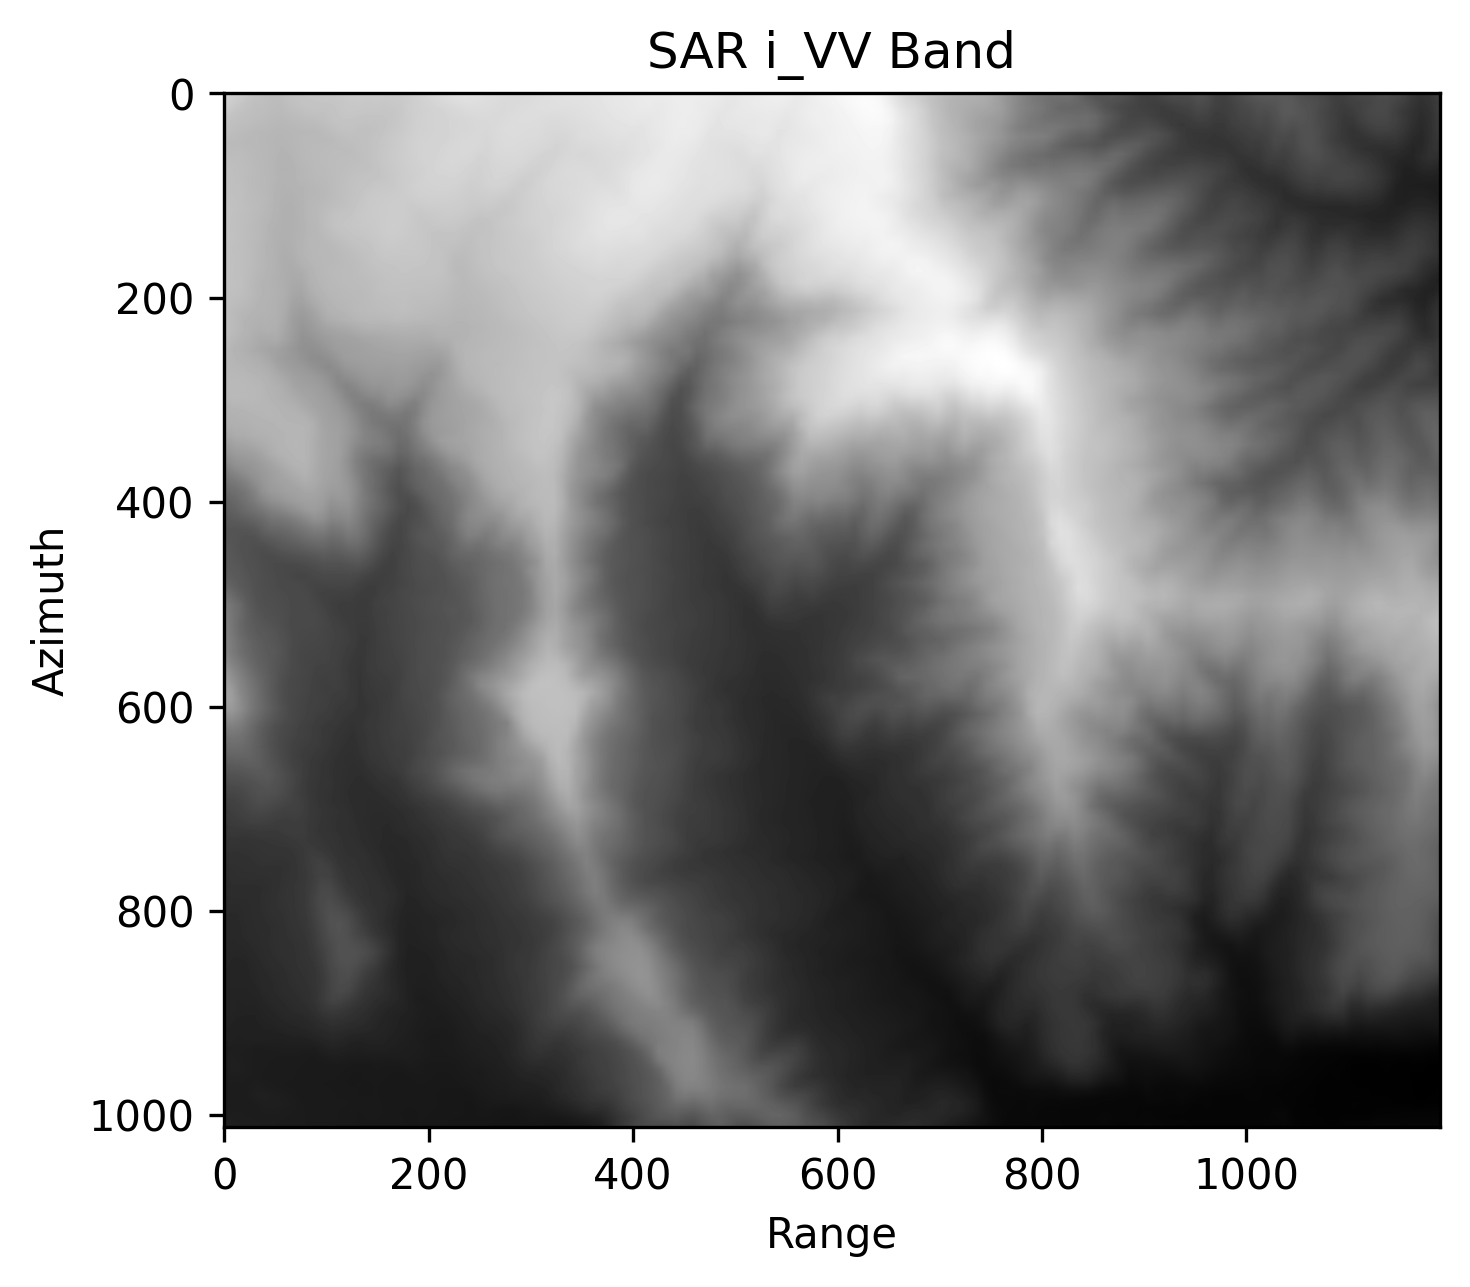

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def read_h5_file(file_path: str) -> dict:
    """Read an HDF5 file and return its contents as a dictionary.
    
    Args:
        file_path: Path to the HDF5 file to read.
        
    Returns:
        Dictionary containing the datasets and their values from the HDF5 file.
        
    Raises:
        FileNotFoundError: If the file doesn't exist.
        OSError: If the file cannot be opened or read.
    """
    data = {}
    
    with h5py.File(file_path, 'r') as h5_file:
        def extract_data(name, obj):
            if isinstance(obj, h5py.Dataset):
                data[name] = obj[()]
        
        h5_file.visititems(extract_data)
    
    return data


path = '/Data_large/SARGFM/data/3_cuts/S1A_IW_SLC__1SDV_20240503T031928_20240503T031942_053701_0685FB_670F/285D_306R.h5'


# Example usage:
data = read_h5_file(path)
print('Available rasters:')
print(list(data.keys()))

# Print attributes of the H5 file
print('\nFile attributes:')
with h5py.File(path, 'r') as h5_file:
    print(f'Root attributes: {dict(h5_file.attrs)}')
    
    for key in h5_file.keys():
        print(f'\nGroup/Dataset: {key}')
        obj = h5_file[key]
        if hasattr(obj, 'attrs'):
            print(f'  Attributes: {dict(obj.attrs)}')
        
        # If it's a group, print attributes of its members
        if isinstance(obj, h5py.Group):
            for subkey in obj.keys():
                subobj = obj[subkey]
                print(f'  {subkey} attributes: {dict(subobj.attrs)}')


# amplitude is already calculated as intensity below, so this line is not needed
amplitude = np.sqrt(data['bands/i_VH']**2 + data['bands/q_VH']**2)

phase = np.arctan2(data['bands/q_VH'], data['bands/i_VH'])


vmin = np.percentile(amplitude, 5)
vmax = np.percentile(amplitude, 97)


ia = data['bands/elevation']

plt.figure(figsize=(5, 5), dpi=300)
plt.imshow(ia, cmap='gray', )
# plt.colorbar(label='phase')
plt.title('SAR i_VV Band')
plt.xlabel('Range')
plt.ylabel('Azimuth')
plt.tight_layout()
plt.show()